<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Segunda-práctica:-Aspectos-prácticos-de-las-redes-neuronales" data-toc-modified-id="Segunda-práctica:-Aspectos-prácticos-de-las-redes-neuronales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Segunda práctica: Aspectos prácticos de las redes neuronales</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Obtención-de-los-datos-y-pre-processing" data-toc-modified-id="Obtención-de-los-datos-y-pre-processing-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Obtención de los datos y pre-processing</a></span></li></ul></li></ul></li><li><span><a href="#Consideraciones-iniciales" data-toc-modified-id="Consideraciones-iniciales-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Consideraciones iniciales</a></span><ul class="toc-item"><li><span><a href="#Train-validation-test-split" data-toc-modified-id="Train-validation-test-split-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Train-validation-test split</a></span></li><li><span><a href="#Un-error-común-con-modelos-de-Keras" data-toc-modified-id="Un-error-común-con-modelos-de-Keras-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Un error común con modelos de Keras</a></span></li><li><span><a href="#Análisis-de-resultados" data-toc-modified-id="Análisis-de-resultados-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Análisis de resultados</a></span></li></ul></li><li><span><a href="#1.-Unidades-de-activación" data-toc-modified-id="1.-Unidades-de-activación-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1. Unidades de activación</a></span></li><li><span><a href="#2.-Inicialización-de-parámetros" data-toc-modified-id="2.-Inicialización-de-parámetros-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>2. Inicialización de parámetros</a></span></li><li><span><a href="#3.-Optimizadores" data-toc-modified-id="3.-Optimizadores-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>3. Optimizadores</a></span></li><li><span><a href="#4.-Regularización-y-red-final-(2.5-puntos)" data-toc-modified-id="4.-Regularización-y-red-final-(2.5-puntos)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>4. Regularización y red final <em>(2.5 puntos)</em></a></span><ul class="toc-item"><li><span><a href="#Evaluación-del-modelo-en-datos-de-test" data-toc-modified-id="Evaluación-del-modelo-en-datos-de-test-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Evaluación del modelo en datos de test</a></span></li></ul></li></ul></li></ul></div>

# Segunda práctica: Aspectos prácticos de las redes neuronales

En esta segunda parte, vamos a continuar desarrollando el problema de Fashion MNIST, con el objetivo de entender los aspectos prácticos del entrenamiento de redes neuronales.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados**. 

In [40]:
# Puedes añadir todos los imports adicionales que necesites aquí
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt

#### Obtención de los datos y pre-processing

In [75]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

## Consideraciones iniciales

### Train-validation-test split

En todos los modelos que entrenemos, vamos a partir los datos de training (x_train) en dos sets: training y validación. De este modo, al final tendremos tres datasets distintos: training, validation, y test. Esta es una estrategia común en el aprendizaje automático, en la que los datos de test (o held-out data) se 
"esconden" hasta el final. Los datos de validación se utilizan para estimar cómo de bien están funcionando nuestros modelos y para observar si estamos cayendo en overfitting. Esto nos permite cambiar hiperparámetros y probar distintas arquitecturas **sabiendo que no estamos utilizando información del test set para "optimizar" los resultados en éste** (si eligiéramos nuestro mejor modelo en base a los resultados de test, estaríamos "haciendo trampas", ya que se ha utilizado la información contenida en éste para elegir el modelo y las métricas reportadas serían optimistas).

Para utilizar un split training-validation data durante el entrenamiento, podemos partir nosotros mismos los datos o dejar que Keras lo haga. Podéis ver cómo hacer estas particiones en la documentación de *fit*.

**Requisito: En todos los entrenamientos de esta práctica, se requiere utilizar el 20% de los datos en x_train como  conjunto de datos de validación**

### Un error común con modelos de Keras

En esta práctica entrenaremos varios modelos para comparar resultados. Un error común en Keras es no instanciar un nuevo modelo cada vez que hacemos un nuevo entrenamiento. Al hacer

*model = Sequential()*

*model.add(lo que sea)  # Definición del modelo*

*model.fit()*

si queremos entrenar un nuevo modelo o el mismo modelo otra vez, es necesario volver a inicializar el modelo con model = Sequential(). Si olvidamos este paso y volvemos a hacer fit(), el modelo seguirá entrenando por donde se quedó en el último fit().

### Análisis de resultados 

A la hora de escribir las respuestas y los análisis pedidos, es importante presentar las conclusiones de manera adecuada a partir de lo visto en nuestros experimentos. Los Jupyter Notebook son una herramienta imprescindible para *data scientists* e ingenieros de Machine Learning para presentar los resultados, incluyendo soporte para incluir gráficas y elementos visuales. Podéis explicar vuestras observaciones del modo que consideréis adecuado, si bien recomendamos la utilización de gráficas para evaluar los entrenamientos y comparar resultados.

Como ayuda, las siguientes funciones pueden resultar interesantes a la hora de evaluar resultados. Todas ellas utilizan el objeto *history* que podéis obtener como salida del método *fit()* de Keras:

history = model.fit(x_train, y_train, ...)

Por supuesto, podéis modificarlas y utilizarlas como prefiráis para crear vuestros propios informes.

In [42]:
def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['accuracy'], color="green")
    plt.plot(history1.history['val_accuracy'], 'r--', color="green")
    plt.plot(history2.history['accuracy'], color="blue")
    plt.plot(history2.history['val_accuracy'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()
    
# Nota: podéis cambiar los números aquí presentes y ejecutar esta línea si queréis cambiar el tamaño
# de las gráficas
# matplotlib.rcParams['figure.figsize'] = [8, 8]


## 1. Unidades de activación

En este ejercicio, vamos a evaluar la importancia de utilizar las unidades de activación adecuadas. Las funciones de activación como sigmoid han dejado de utilizarse en favor de otras unidades como ReLU.

**Ejercicio 1 *(2.5 puntos)***: Partiendo de una red sencilla como la desarrollada en el Trabajo 1, escribir un breve análisis comparando la utilización de unidades sigmoid y ReLU (por ejemplo, se pueden comentar aspectos como velocidad de convergencia, métricas obtenidas...). Explicar por qué pueden darse estas diferencias. Opcionalmente, comparar con otras activaciones disponibles en Keras.

*Pista: Usando redes más grandes se hace más sencillo apreciar las diferencias. Es mejor utilizar al menos 3 o 4 capas densas.*

In [43]:
## Definición de parámetros generales

hidden_units_1 = 128
hidden_units_2 = 64
hidden_units_3 = 64
dropout_rate = 0.25
batch_size = 64
epochs = 20
validation_split = 0.20
metrics = ['accuracy']

In [76]:
## Obteniendo las etiquetas y convertiendo los valores de las categorías en un vector one-hot
import numpy as np
from keras.utils import to_categorical

labels, counts = np.unique(y_train, return_counts=True)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [45]:
## Método que construye un modelo con:
## - 1 capa Flatten de entrada para aplanar las imágenes de entrenamiento
## - 3 capas densas ocultas con función de activación "activation_function"
## - 1 capa Dropout para borrar pesos de forma aleatoria durante el entrenamiento, para evitar el sobreajuste
## - 1 capa densa de salida con función de activación softmax

def build_model(x_train, labels, activation_function='relu', loss_function='categorical_crossentropy', 
                optimizer = 'adam', initializer = 'glorot_uniform'):

  model = Sequential()
  model.add(Flatten(input_shape=(x_train.shape[1] , x_train.shape[2])))
  model.add(Dense(hidden_units_1, activation=activation_function, kernel_initializer=initializer))
  model.add(Dense(hidden_units_2, activation=activation_function))
  model.add(Dense(hidden_units_3, activation=activation_function))
  model.add(Dropout(dropout_rate))
  model.add(Dense(len(labels), activation='softmax'))

  model.compile(loss=loss_function,
                        optimizer=optimizer,
                        metrics=metrics)
  return model

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                650       
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
_______________________________________________

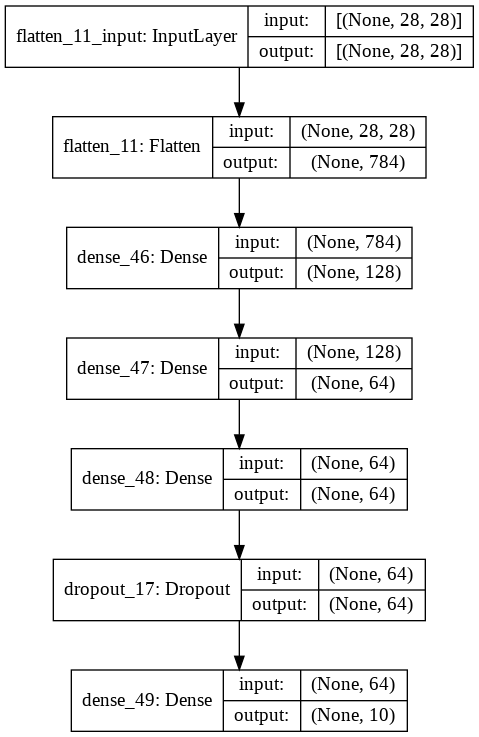

In [46]:
## Obteniendo el modelo con función de activación Sigmoid, función de perdidad Binary Crossentropy y optimizador SGD.
from keras.optimizers import SGD
from keras.utils import plot_model

model_sigmoid = build_model(x_train, labels, 'sigmoid', 'binary_crossentropy', SGD(learning_rate = 0.1, momentum=0.9))

model_sigmoid.summary()
plot_model(model_sigmoid, show_shapes=True)

**Comentario:** Se muestra una sola vez la información del modelo ya que la estructura de la red, el número de capas y el número nodos por capa, y el número de parámetros por capa y total es el mismo que en todos los modelos que se construyen en esta pregunta.

In [47]:
## Entrenando modelo
history_sigmoid = model_sigmoid.fit(x_train, y_train,
                  validation_split=validation_split,
                  batch_size=batch_size,
                  epochs=epochs)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.3357 - accuracy: 0.1311 - val_loss: 0.2504 - val_accuracy: 0.3863
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2380 - accuracy: 0.3960 - val_loss: 0.1899 - val_accuracy: 0.5588
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1891 - accuracy: 0.5593 - val_loss: 0.1600 - val_accuracy: 0.6212
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1613 - accuracy: 0.6351 - val_loss: 0.1345 - val_accuracy: 0.6997
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1374 - accuracy: 0.7006 - val_loss: 0.1162 - val_accuracy: 0.7582
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1227 - accuracy: 0.7352 - val_loss: 0.1086 - val_accuracy: 0.7718
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1133 - accuracy: 0.7570 - val_loss: 0.1022 - val_accuracy: 0.7821
Epoch 

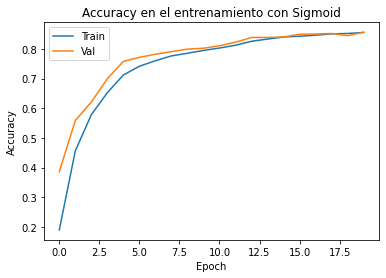

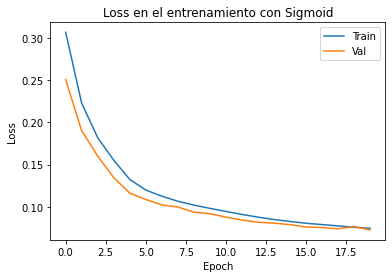

In [48]:
## Dibujar gráfica de los valores de Accuracy y Loss del modelo entrenado con Sigmoid

plot_acc(history_sigmoid, "Accuracy en el entrenamiento con Sigmoid")
plot_loss(history_sigmoid, "Loss en el entrenamiento con Sigmoid")

In [49]:
## Obteniendo el modelo con función de activación ReLU, función de perdidad Categorical Crossentropy y optimizador Adam.
model_relu = build_model(x_train, labels)

## Entrenando modelo
history_relu = model_relu.fit(x_train, y_train,
                  validation_split=validation_split,
                  batch_size=batch_size,
                  epochs=epochs)

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 0.8448 - accuracy: 0.7020 - val_loss: 0.4907 - val_accuracy: 0.8142
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4388 - accuracy: 0.8427 - val_loss: 0.4206 - val_accuracy: 0.8463
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3791 - accuracy: 0.8630 - val_loss: 0.3886 - val_accuracy: 0.8621
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3484 - accuracy: 0.8735 - val_loss: 0.3598 - val_accuracy: 0.8689
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3267 - accuracy: 0.8808 - val_loss: 0.3556 - val_accuracy: 0.8744
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3114 - accuracy: 0.8886 - val_loss: 0.3334 - val_accuracy: 0.8785
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3022 - accuracy: 0.8898 - val_loss: 0.3267 - val_accuracy: 0.8834
Epoch 

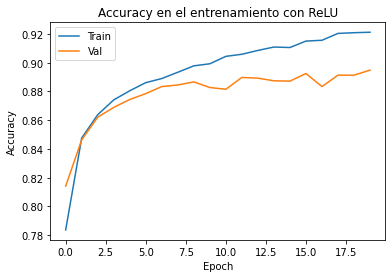

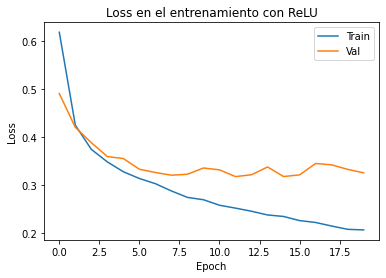

In [50]:
## Dibujar gráfica de los valores de Accuracy y Loss del modelo entrenado con ReLU

plot_acc(history_relu, "Accuracy en el entrenamiento con ReLU")
plot_loss(history_relu, "Loss en el entrenamiento con ReLU")

**Respuesta:** En este ejercicio he entrenado con los mismos parámetros globales (números de nodos por cada capa, tasa de dropout para el entrenamiento, entre otros) a dos modelos, donde en uno de ellos la función de activación es *Sigmoid*, y el otro modelo su función de activación es *ReLU*. Además, en cada modelo uso sus **respectivos optimizadores y funciones de perdidas** más adecuados ajustando un poco sus parámetros.

Como resultado del entrenamiento, se observa que el modelo con la función de activación **ReLU tiene un resultado más aceptable si nos referimos al accuracy**, sin embargo, el valor loss respecto de los datos de validación es alto. Una característica negativa vista de este modelo es que parece que sufre de **overfitting** porque el accuracy y loss de los datos de validación se alejan respecto a sus análogos de los datos de entrenamiento, es decir, *esta memorizando muy bien los registros de entrenamiento, pero no es capaz de predecir bien nuevos registros no vistos antes*. Otra observación que se destaca es que para la cantidad de epocas definidas (20) se puede apreciar la **evolución del entrenamiento** llegando a valores casi estables en las últimas epocas.

Respecto al modelo que fue entrenado con la función de activación *Sigmoid*, he tenido que ajustar los parámetros de la función de perdida, porque **no estaba encontrando los mínimos locales**. Con los nuevos parámetros de la tasa de aprendizaje y el momentum, se obtiene un resultado bueno de accuracy pero peor al de ReLU, si embargo, la ventaja se resalta en **los valores de loss que mejoran sustancialmente a los de ReLU**, 0.069 (Sigmoid) vs 0.1903 (ReLU). En este modelo se puede ver también que *no se sufre de overfitting*, es decir, el modelo predice con mucha similitud los datos de entrenamiento y los de validación.

In [51]:
## Obteniendo el modelo con función de activación Tangente Hiperbólica, función de perdidad MSE y optimizador Adam.
model_tanh = build_model(x_train, labels, 'tanh', 'mean_squared_error')

## Entrenando modelo
history_tanh = model_tanh.fit(x_train, y_train,
                  validation_split=validation_split,
                  batch_size=batch_size,
                  epochs=epochs)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0346 - accuracy: 0.7514 - val_loss: 0.0223 - val_accuracy: 0.8428
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0216 - accuracy: 0.8500 - val_loss: 0.0215 - val_accuracy: 0.8508
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0199 - accuracy: 0.8630 - val_loss: 0.0204 - val_accuracy: 0.8555
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0187 - accuracy: 0.8718 - val_loss: 0.0186 - val_accuracy: 0.8732
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0175 - accuracy: 0.8808 - val_loss: 0.0179 - val_accuracy: 0.8760
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0166 - accuracy: 0.8876 - val_loss: 0.0177 - val_accuracy: 0.8788
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0162 - accuracy: 0.8900 - val_loss: 0.0174 - val_accuracy: 0.8808
Epoch 

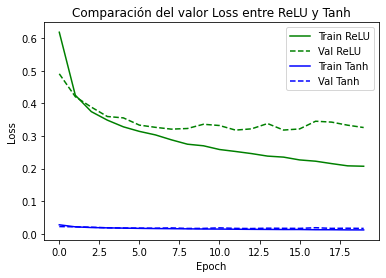

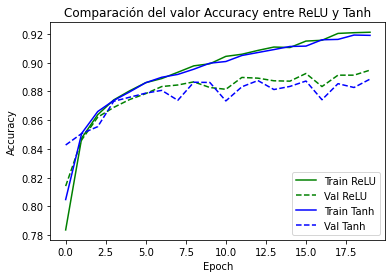

In [52]:
## Dibujar gráfica de los valores de Accuracy y Loss del modelo entrenado con Tanh

plot_compare_losses(history_relu, history_tanh, "ReLU", "Tanh", "Comparación del valor Loss entre ReLU y Tanh")
plot_compare_accs(history_relu, history_tanh, "ReLU", "Tanh", "Comparación del valor Accuracy entre ReLU y Tanh")

**Respuesta:** En este nuevo modelo entrenado con la función de activación Tanh vemos que se produce *una tendencia del valor accuracy similar al de ReLU*, sin embargo **mejora considerablemente el valor loss** tanto en datos de entrenamiento, como en datos de validación. Este modelo también tiene tendencia a sufrir de **overfitting** al igual que el modelo de ReLU.

In [53]:
## Obteniendo el modelo con función de activación Softplus, función de perdidad Categorical Crossentropy y optimizador Adam.
model_softplus = build_model(x_train, labels, 'softplus', 'categorical_crossentropy')

## Entrenando modelo
history_softplus = model_softplus.fit(x_train, y_train,
                  validation_split=validation_split,
                  batch_size=batch_size,
                  epochs=epochs)

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 0.9746 - accuracy: 0.6554 - val_loss: 0.4418 - val_accuracy: 0.8378
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4663 - accuracy: 0.8312 - val_loss: 0.4149 - val_accuracy: 0.8465
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4120 - accuracy: 0.8509 - val_loss: 0.3846 - val_accuracy: 0.8608
Epoch 4/20
750/750 [==============================] - 3s 3ms/step - loss: 0.3739 - accuracy: 0.8620 - val_loss: 0.3545 - val_accuracy: 0.8687
Epoch 5/20
750/750 [==============================] - 3s 3ms/step - loss: 0.3577 - accuracy: 0.8682 - val_loss: 0.3491 - val_accuracy: 0.8749
Epoch 6/20
750/750 [==============================] - 3s 3ms/step - loss: 0.3337 - accuracy: 0.8772 - val_loss: 0.3659 - val_accuracy: 0.8643
Epoch 7/20
750/750 [==============================] - 3s 3ms/step - loss: 0.3215 - accuracy: 0.8799 - val_loss: 0.3277 - val_accuracy: 0.8827
Epoch 

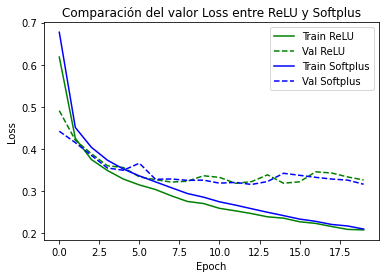

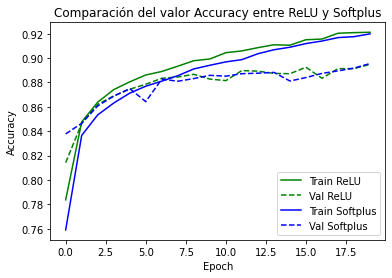

In [54]:
## Dibujar gráfica de los valores de Accuracy y Loss del modelo entrenado con Softplus

plot_compare_losses(history_relu, history_softplus, "ReLU", "Softplus", "Comparación del valor Loss entre ReLU y Softplus")
plot_compare_accs(history_relu, history_softplus, "ReLU", "Softplus", "Comparación del valor Accuracy entre ReLU y Softplus")

**Respuesta:** Usar la función **softplus** (una acercamiento a la funcioón ReLU con una curva suave) **no mejora el resultado de ReLU**, e incluso reproduce casi exactamente sus resultados, pero si se observa más suavidad en la gráfica, es decir, tiene menor varianza respecto a ReLU.

## 2. Inicialización de parámetros

En este ejercicio, vamos a evaluar la importancia de una correcta inicialización de parámetros en una red neuronal.

**Ejercicio 2 *(2.5 puntos)***: Partiendo de una red similar a la del ejercicio anterior (usando ya ReLUs), comentar las diferencias que se aprecian en el entrenamiento al utilizar distintas estrategias de inicialización de parámetros. Para ello, inicializar todas las capas con las siguientes estrategias, disponibles en Keras, y analizar sus diferencias:

* Inicialización con ceros.
* Inicialización con una variable aleatoria normal.
* Inicialización con los valores por defecto de Keras para una capa Dense (estrategia *glorot uniform*)

In [55]:
from tensorflow.keras import initializers

## Obteniendo el modelo con función de activación ReLU, función de perdidad Categorical Crossentropy, optimizador Adam e inicializador de ceros.
model_relu_zeros = build_model(x_train, labels, initializer=initializers.Zeros())

## Entrenando modelo
history_relu_zeros = model_relu_zeros.fit(x_train, y_train, 
                  validation_split=validation_split,
                  batch_size=batch_size,
                  epochs=epochs)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 2.3026 - accuracy: 0.1016 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 2.3027 - accuracy: 0.1016 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 

In [56]:
## Obteniendo el modelo con función de activación ReLU, función de perdidad Categorical Crossentropy, optimizador Adam e inicializador de ceros.
model_relu_random = build_model(x_train, labels, initializer=initializers.RandomNormal(mean=0.0, stddev=1.0))

## Entrenando modelo
history_relu_random = model_relu_random.fit(x_train, y_train,
                  validation_split=validation_split,
                  batch_size=batch_size,
                  epochs=epochs)

Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 1.6054 - accuracy: 0.5983 - val_loss: 0.5190 - val_accuracy: 0.8107
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5385 - accuracy: 0.8077 - val_loss: 0.4507 - val_accuracy: 0.8382
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4575 - accuracy: 0.8364 - val_loss: 0.4200 - val_accuracy: 0.8535
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4101 - accuracy: 0.8528 - val_loss: 0.4017 - val_accuracy: 0.8586
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3858 - accuracy: 0.8596 - val_loss: 0.3951 - val_accuracy: 0.8624
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3663 - accuracy: 0.8647 - val_loss: 0.3864 - val_accuracy: 0.8640
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3508 - accuracy: 0.8729 - val_loss: 0.3825 - val_accuracy: 0.8662
Epoch 

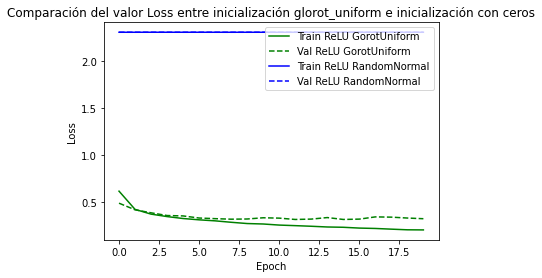

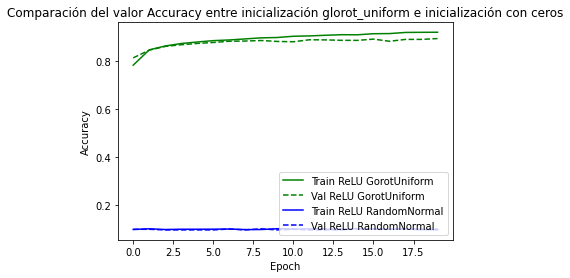

In [57]:
## Dibujar gráfica de los valores de Accuracy y Loss para los modelos entrenado con ReLU, el verde con inicializador "glorot_uniform" y el azul con inicializador de pesos en ceros.
plot_compare_losses(history_relu, history_relu_zeros, "ReLU GorotUniform", "ReLU RandomNormal", "Comparación del valor Loss entre inicialización glorot_uniform e inicialización con ceros")
plot_compare_accs(history_relu, history_relu_zeros, "ReLU GorotUniform", "ReLU RandomNormal", "Comparación del valor Accuracy entre inicialización glorot_uniform e inicialización con ceros")

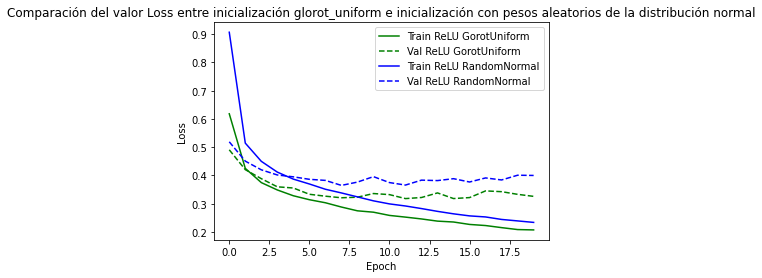

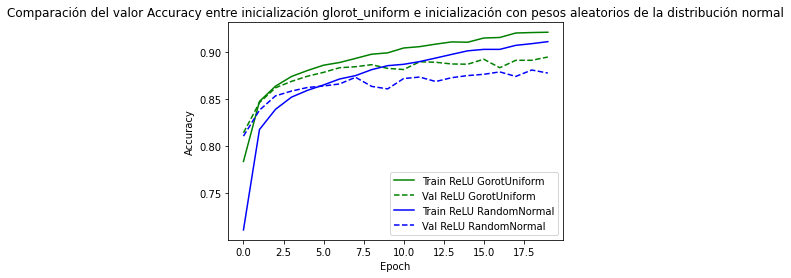

In [58]:
## Dibujar gráfica de los valores de Accuracy y Loss para los modelos entrenado con ReLU, el verde con inicializador "glorot_uniform" y el azul con inicializador de la distribución normal.
plot_compare_losses(history_relu, history_relu_random, "ReLU GorotUniform", "ReLU RandomNormal", "Comparación del valor Loss entre inicialización glorot_uniform e inicialización con pesos aleatorios de la distribución normal")
plot_compare_accs(history_relu, history_relu_random, "ReLU GorotUniform", "ReLU RandomNormal", "Comparación del valor Accuracy entre inicialización glorot_uniform e inicialización con pesos aleatorios de la distribución normal")

**Respuesta**: 

## 3. Optimizadores

**Ejercicio 3 *(2.5 puntos)***: Partiendo de una red similar a la del ejercicio anterior (utilizando la mejor estrategia de inicialización observada), comparar y analizar las diferencias que se observan  al entrenar con varios de los optimizadores vistos en clase, incluyendo SGD como optimizador básico (se puede explorar el espacio de hiperparámetros de cada optimizador, aunque para optimizadores más avanzados del estilo de adam y RMSprop es buena idea dejar los valores por defecto provistos por Keras).

In [59]:
## Obteniendo el modelo con función de activación ReLU, función de perdidad Categorical Crossentropy y optimizador SGD.
model_relu_sgd = build_model(x_train, labels, optimizer=SGD(learning_rate = 0.01, momentum=0.9))

## Entrenando modelo
history_relu_sgd = model_relu_sgd.fit(x_train, y_train,
                  validation_split=validation_split,
                  batch_size=batch_size,
                  epochs=epochs)

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 0.9786 - accuracy: 0.6500 - val_loss: 0.4720 - val_accuracy: 0.8237
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4617 - accuracy: 0.8368 - val_loss: 0.4062 - val_accuracy: 0.8541
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.4138 - accuracy: 0.8519 - val_loss: 0.4098 - val_accuracy: 0.8526
Epoch 4/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3830 - accuracy: 0.8626 - val_loss: 0.3580 - val_accuracy: 0.8679
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3518 - accuracy: 0.8724 - val_loss: 0.3708 - val_accuracy: 0.8633
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3469 - accuracy: 0.8761 - val_loss: 0.3460 - val_accuracy: 0.8739
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3204 - accuracy: 0.8809 - val_loss: 0.3338 - val_accuracy: 0.8750
Epoch 

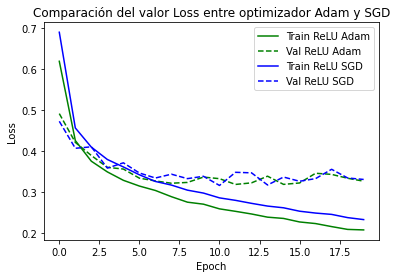

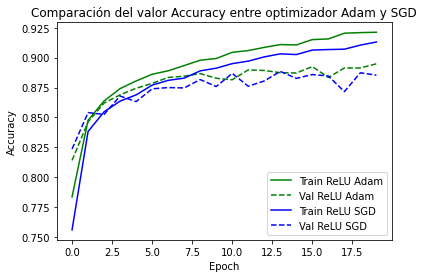

In [60]:
## Dibujar gráfica de los valores de Accuracy y Loss para los modelos entrenado con ReLU, el verde con inicializador "glorot_uniform" y el azul con inicializador de la distribución normal.
plot_compare_losses(history_relu, history_relu_sgd, "ReLU Adam", "ReLU SGD", "Comparación del valor Loss entre optimizador Adam y SGD")
plot_compare_accs(history_relu, history_relu_sgd, "ReLU Adam", "ReLU SGD", "Comparación del valor Accuracy entre optimizador Adam y SGD")

In [61]:
from keras.optimizers import RMSprop

## Obteniendo el modelo con función de activación ReLU, función de perdidad Categorical Crossentropy y optimizador RMSprop.
model_relu_rmsprop = build_model(x_train, labels, optimizer=RMSprop())

## Entrenando modelo
history_relu_rmsprop = model_relu_rmsprop.fit(x_train, y_train,
                  validation_split=validation_split,
                  batch_size=batch_size,
                  epochs=epochs)

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 0.8353 - accuracy: 0.7068 - val_loss: 0.4441 - val_accuracy: 0.8412
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4457 - accuracy: 0.8401 - val_loss: 0.4056 - val_accuracy: 0.8585
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3848 - accuracy: 0.8648 - val_loss: 0.3745 - val_accuracy: 0.8660
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3584 - accuracy: 0.8695 - val_loss: 0.3723 - val_accuracy: 0.8709
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3352 - accuracy: 0.8788 - val_loss: 0.3732 - val_accuracy: 0.8658
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3325 - accuracy: 0.8817 - val_loss: 0.3567 - val_accuracy: 0.8763
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3156 - accuracy: 0.8874 - val_loss: 0.3601 - val_accuracy: 0.8763
Epoch 

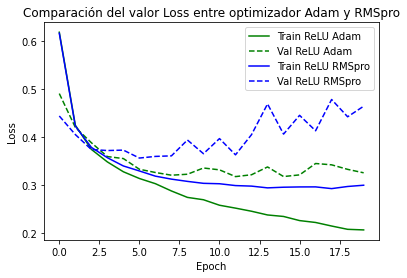

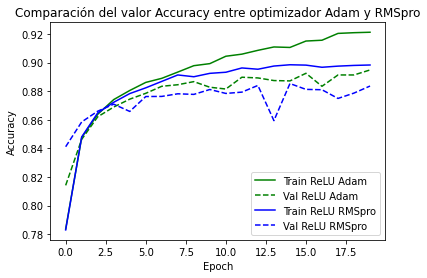

In [62]:
## Dibujar gráfica de los valores de Accuracy y Loss para los modelos entrenado con ReLU, el verde con optimizador "Adam" y el azul con RMSprop.
plot_compare_losses(history_relu, history_relu_rmsprop, "ReLU Adam", "ReLU RMSpro", "Comparación del valor Loss entre optimizador Adam y RMSpro")
plot_compare_accs(history_relu, history_relu_rmsprop, "ReLU Adam", "ReLU RMSpro", "Comparación del valor Accuracy entre optimizador Adam y RMSpro")

In [63]:
from keras.optimizers import Nadam

## Obteniendo el modelo con función de activación ReLU, función de perdidad Categorical Crossentropy y optimizador Nadam.
model_relu_nadam = build_model(x_train, labels, optimizer=Nadam())

## Entrenando modelo
history_relu_nadam = model_relu_nadam.fit(x_train, y_train,
                  validation_split=validation_split,
                  batch_size=batch_size,
                  epochs=epochs)

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.8145 - accuracy: 0.7160 - val_loss: 0.4195 - val_accuracy: 0.8463
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4123 - accuracy: 0.8528 - val_loss: 0.3659 - val_accuracy: 0.8689
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3605 - accuracy: 0.8709 - val_loss: 0.3469 - val_accuracy: 0.8739
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3400 - accuracy: 0.8785 - val_loss: 0.3459 - val_accuracy: 0.8773
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3109 - accuracy: 0.8868 - val_loss: 0.3295 - val_accuracy: 0.8830
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2880 - accuracy: 0.8957 - val_loss: 0.3196 - val_accuracy: 0.8848
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2802 - accuracy: 0.8969 - val_loss: 0.3456 - val_accuracy: 0.8814
Epoch 

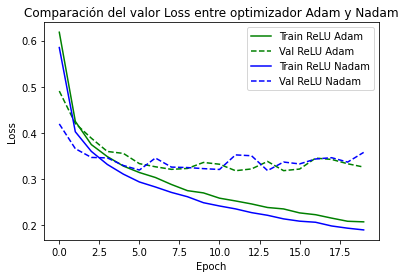

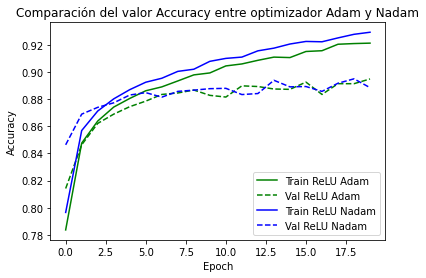

In [64]:
## Dibujar gráfica de los valores de Accuracy y Loss para los modelos entrenado con ReLU, el verde con optimizador Adam y el azul con Nadam.
plot_compare_losses(history_relu, history_relu_nadam, "ReLU Adam", "ReLU Nadam", "Comparación del valor Loss entre optimizador Adam y Nadam")
plot_compare_accs(history_relu, history_relu_nadam, "ReLU Adam", "ReLU Nadam", "Comparación del valor Accuracy entre optimizador Adam y Nadam")

**Respuesta**: He probado tres tipos de optimizadores distintos al usado en el modelo construido con la función de activación ReLU de la pregunta anterior. Comparando los resultados para cada optimizador, se observa que el mejor resultado ha sido con el optimizador **NADAM**, que mejora ligeramente al optimizador ADAM.

Se podría decir que el *peor otimizador* para este modelo y grupo de datos de entrenamiento fue el RMSprop. Para el caso del optimizador SGD, se ha tenido que **buscar nuevos valores para sus parámetros** que mejora el resultado que genera los parámetros por defecto.

## 4. Regularización y red final *(2.5 puntos)*

**Ejercicio 4.1**: Entrenar una red final que sea capaz de obtener una accuracy en el validation set cercana al 90%. Para ello, combinar todo lo aprendido anteriormente y utilizar técnicas de regularización para evitar overfitting. Algunos de los elementos que pueden tenerse en cuenta son los siguientes.

* Número de capas y neuronas por capa
* Optimizadores y sus parámetros
* Batch size
* Unidades de activación
* Uso de capas dropout, regularización L2, regularización L1...
* Early stopping (se puede aplicar como un callback de Keras, o se puede ver un poco "a ojo" cuándo el modelo empieza a caer en overfitting y seleccionar el número de epochs necesarias)
* Batch normalization

Si los modelos entrenados anteriormente ya se acercaban al valor requerido de accuracy, probar distintas estrategias igualmente y comentar los resultados.

Explicar brevemente la estrategia seguida y los modelos probados para obtener el modelo final, que debe verse entrenado en este Notebook. No es necesario guardar el entrenamiento de todos los modelos que se han probado, es suficiente con explicar cómo se ha llegado al modelo final.

In [88]:
## Método que construye un modelo final de la práctica con:
## - 1 capa Flatten de entrada para aplanar las imágenes de entrenamiento
## - 3 capas densas ocultas con función de activación "relu"
## - 1 capa Dropout para borrar pesos de forma aleatoria durante el entrenamiento, para evitar el sobreajuste
## - 1 capa densa de salida con función de activación softmax

def build_final_model(x_train, labels):

  model = Sequential()
  model.add(Flatten(input_shape=(x_train.shape[1] , x_train.shape[2])))
  model.add(Dense(128, activation='softplus'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='softplus'))
  model.add(Dropout(0.3))
  model.add(Dense(256, activation='softplus'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='softplus'))
  model.add(Dropout(0.3))
  model.add(Dense(len(labels), activation='softmax'))

  model.summary()
  plot_model(model, show_shapes=True)

  model.compile(loss='categorical_crossentropy',
                        optimizer='nadam',
                        metrics=['accuracy'])
  return model

In [89]:
from keras.callbacks import EarlyStopping

## Obteniendo el modelo final.
final_model = build_final_model(x_train, labels)

## Definiendo la parada del entrenamiento
callback = [EarlyStopping(monitor='val_accuracy', patience=10)]

## Entrenando modelo
history_final = final_model.fit(x_train, y_train,
                  validation_split=validation_split,
                  batch_size=64,
                  epochs=80,
                  callbacks=callback)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 128)               100480    
_________________________________________________________________
dropout_50 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_113 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_51 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_114 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_52 (Dropout)         (None, 256)             

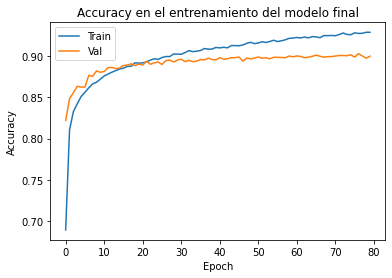

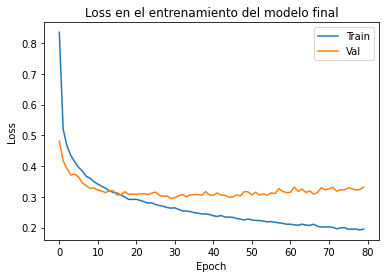

In [78]:
## Dibujar gráfica de los valores de Accuracy y Loss del modelo entrenado con Sigmoid

plot_acc(history_final, "Accuracy en el entrenamiento del modelo final")
plot_loss(history_final, "Loss en el entrenamiento del modelo final")

**Respuesta**: Para mejorar los resultados del entrenamiento, concretamente la predicción sobre los valores de validación, se han aplicado algunas técnicas que mejoran la predicción y la reducen algunos problemas como el overfitting.

Entre las principales técnicas o herramientas usadas tenemos, selección de número de capas ocultas y nodos por capa, función de activación, función de perdida, optimizador, incorporación de capas de Dropout, etc.

* Se ha ajustado el número de capas y el número de nodos para mejorar el valor de **val_accuracy**.
* Se inicio con una función de activación ReLU, pero despúes se obtuvo mejores resultados con **Softplus**.
* Se mantuvo la función de perdida **categorical_crossentropy** porque el resto no mejoraba el resultado.
* A partir del resultado de la pregunta anterior se ha decidido usar el optimizador **NADAM**.
* Dado que se producía overffing con pocas epicas, se ha añadido capas **Dropout** con una tasa de 0.3.
* También se ha creado un callback de tipo **EarlyStopping** con un valor de paciencia de *10* para detener el entramiento cuando ya no mejore el valor de *val_accuracy*. En el último entrenamiento no se ha detenido antes de las 80 epocas.
* Finalmente se han ajustado los valores de **batch_size** y **epochs** para conseguir llegar al *90% de val_accuracy*.

Después de aplicar todos los pasos descritos previamente, se ha logrado conseguir pocas iteraciones que superen el *90% de val_accuracy* pero la mayoría estuvieron en **89%**.

### Evaluación del modelo en datos de test

Una vez elegido el que creemos que es nuestro mejor modelo a partir de la estimación que hemos visto en los datos de validación, es hora de utilizar los datos de test para ver cómo se comporta nuestro modelo ante nuevos datos. Si hemos hecho bien las cosas, este número debería ser parecido al valor de nuestra estimación vista en los datos de validación.

**Pregunta 4.2**. Utilizando nuestro mejor modelo, obtener la accuracy resultante en el dataset de test. Comentar este resultado.

In [77]:
loss, acc = final_model.evaluate(x_test, y_test, batch_size=64)
print("\nTest loss: %.1f%%" % (100.0 * loss))
print("Test accuracy: %.1f%%" % (100.0 * acc))

157/157 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.8973

Test loss: 35.8%
Test accuracy: 89.7%


In [69]:
result = final_model.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(np.argmax(y_test, axis=1), np.argmax(result, axis=1))

array([[851,   2,   7,  32,   4,   1,  95,   0,   8,   0],
       [  1, 970,   4,  22,   1,   0,   1,   0,   1,   0],
       [ 12,   0, 769,  14, 124,   0,  78,   0,   3,   0],
       [ 16,   3,   6, 924,  24,   0,  21,   0,   6,   0],
       [  0,   0,  58,  46, 845,   0,  47,   0,   4,   0],
       [  0,   0,   0,   0,   0, 972,   0,  17,   1,  10],
       [129,   0,  65,  34,  78,   0, 680,   0,  14,   0],
       [  0,   0,   0,   0,   0,  19,   0, 965,   0,  16],
       [  3,   1,   1,   4,   3,   4,   3,   2, 979,   0],
       [  0,   0,   0,   0,   0,  11,   1,  42,   0, 946]])

In [70]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), np.argmax(result, axis=1)))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.77      0.81      1000
           3       0.86      0.92      0.89      1000
           4       0.78      0.84      0.81      1000
           5       0.97      0.97      0.97      1000
           6       0.73      0.68      0.71      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**Respuesta**: El valor del accuracy conseguido con los datos de pruebas es del **89.7%**, muy similar a los valores de val_accuracy conseguidos en el entrenamiento.
* Las prendas que **mejor predijo** el modelo a partir de los datos de prueba son el **Trouser, Ankle boot y Sandal**, ya que tienen una forma diferentes al resto de prendas.
* En el tipo de prenda en que **más problemas tuvo al predecir fue Shirt**, porque es el que más tiene parecido con el resto de prendas, por ejemplo *T-Shirt, Pullover, Dress y Coat*.